In [1]:
import os
import pandas
import matplotlib
from matplotlib.ticker import EngFormatter

In [4]:
file = open("server_output.csv")

In [5]:
file_content = file.read()

In [6]:
last_prefix = None

In [7]:
last_prefix = None
new_file_content = ""
for line in file_content.split("\n"):
    line_fragments = line.split(",")
    if len(line_fragments) == 3:
        last_prefix = line.replace("k", "000").replace("G", "000000000")
    else:
        new_file_content += last_prefix + "," + line + "\n"

In [8]:
with open("server_output_m.csv", "w") as destiny_file:
    destiny_file.write("clients_number,datagram_size,bandwidth,date,receiver_ip,receiver_port,sender_ip,sender_port,number,time_slot,bytes_sent,real_bandwidth,jitter,datagrams_lost,datagrams_sent,drop_rate,out_of_order\n")
    destiny_file.write(new_file_content)

In [9]:
b = pandas.read_csv("server_output_m.csv")

Content of last line in measurements vary from sth. It can be summary from 0 sec to 10 sec or just 9-10 result. 
So I will just remove both.

In [10]:
removed_summaries = b[b["time_slot"] != "0.0-10.0"] 

In [11]:
removed_last_time_slot = removed_summaries[removed_summaries["time_slot"] != "9.0-10.0"]

In [12]:
cleaned = removed_last_time_slot

In [13]:
grouped_results = cleaned.groupby(["bandwidth", "datagram_size"])

In [14]:
summed = grouped_results.sum()

In [15]:
summed["drop_rate"] = summed["datagrams_lost"] / summed["datagrams_sent"]

In [16]:
sorted_summed = summed.sort_index("index")

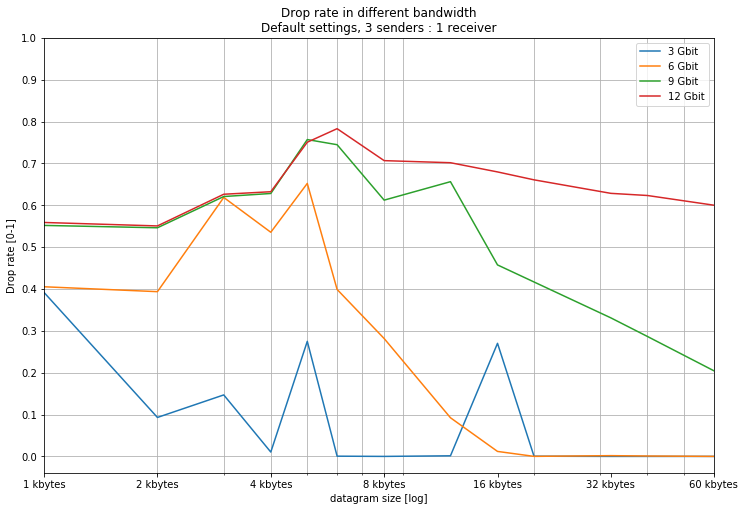

In [22]:
matplotlib.pyplot.xscale("log")
fig = matplotlib.pyplot.figure(1)
def get_label(value, unit):
    unit_scale_map = {1000000000: "G",
                      1000000: "M",
                      1000: "K",
                      1: ""}
    for scale in unit_scale_map.keys():
        scaled_value = value * 1.0 / scale
        if scaled_value >= 1:
            scaled_value_with_unit = str(scaled_value) + \
                                    " " + unit_scale_map[scale] + unit
            return scaled_value_with_unit
    
ax = fig.axes[0]
for bandwidth in median.index.levels[0]:
    data = median.loc[(bandwidth,)]
    label = get_label(bandwidth, "bit")
    data.plot(y=y_label, label=label, ax=ax)
formatter0 = EngFormatter(unit='bytes')
ax.xaxis.set_major_formatter(formatter0)
ax.grid(True, which='minor', axis='x' )
ax.grid(True, which='major', axis='y' )
ax.set_xlabel("datagram size [log]")
ax.set_title("Drop rate in different bandwidth\nDefault settings, 3 senders : 1 receiver")
ax.set_ylabel("Drop rate [0-1]")
ax.set_yticks([i / 100 for i in range(0, 110, 10)])
ax.set_xticks([1000, 2000, 4000, 8000, 16000, 32000, 60000])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 8)
matplotlib.pyplot.savefig("drop_rate.png")